# Week 13 - Simple Linear Regression
#### Rendy Wirawan Tamrin - 00000053580

#### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Bahan Modul 13/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Eksplorasi beberapa fitur

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


#### Plot fitur-fitur tersebut

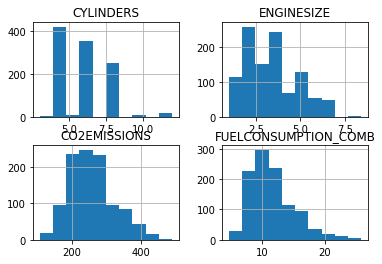

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

#### Plot fitur-fitur vs emisi

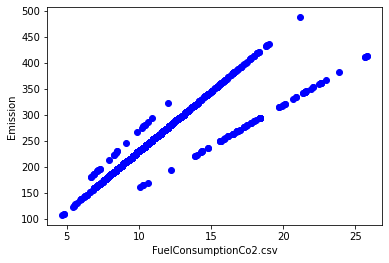

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FuelConsumptionCo2.csv")
plt.ylabel("Emission")
plt.show()

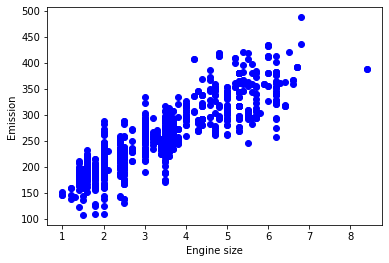

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Challenge
#### 1. Plot CYLINDER vs the Emission, untuk melihat hubungan linearnya

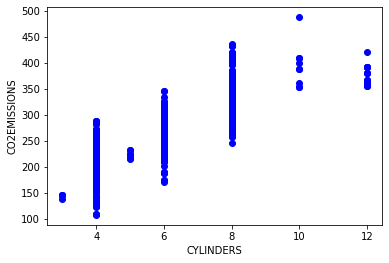

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### Pembuatan dataset pelatihan dan pengujian

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Distribusi data pelatihan

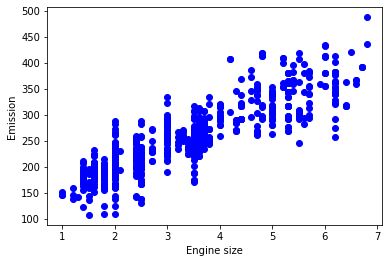

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modelling

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Coefficients:  [[39.77693059]]
Intercept:  [122.5997668]


#### Plot output model

Text(0, 0.5, 'Emission')

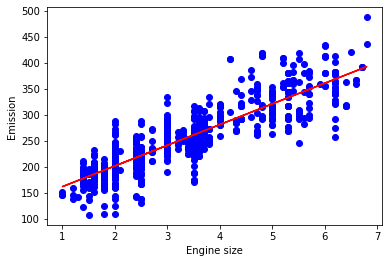

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluasi

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 23.51
Residual sum of squares (MSE): 883.840401
R2-score: 0.74


#### Model Regresi Variabel Jamak
1. Buatlah seperti langkah no. 9 untuk variabel – variabel: Engine size, Fuel Consumptions, dan Cylinders!
2. Lakukan langkah pemodelan seperti no.10 dengan menggunakan 3 variabel tersebut sebagai data X!
3. Lakukan sampai tahap evaluasinya!

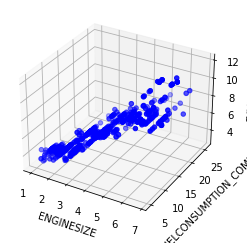

In [22]:
# Nomor 1
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = train['ENGINESIZE']
y = train['FUELCONSUMPTION_COMB']
z = train['CYLINDERS']

ax.scatter(x, y, z, c='blue')

ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('FUELCONSUMPTION_COMB')
ax.set_zlabel('CYLINDERS')

plt.show()

In [23]:
# Nomor 2
# Modelling

from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = (train[['ENGINESIZE', 'CYLINDERS']])
train_y = (train[['FUELCONSUMPTION_COMB']])

# Fit model
regr.fit(train_x, train_y)

# Coefficients
print('Coefficients: ', regr.coef_)
# Intercept
print('Intercept: ', regr.intercept_)

Coefficients:  [[1.882303   0.12683174]]
Intercept:  [4.50329208]


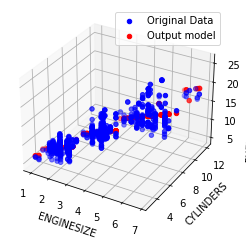

In [25]:
# Nomor 3
# Plot Output Model

predictions = regr.predict(train_x)

# Plotting the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_x['ENGINESIZE'], train_x['CYLINDERS'], y, c='blue', label='Original Data')

# Plotting the predicted values
ax.scatter(train_x['ENGINESIZE'], train_x['CYLINDERS'], predictions, c='red', label='Output model')

ax.set_xlabel('ENGINESIZE')
ax.set_ylabel('CYLINDERS')
ax.set_zlabel('FUELCONSUMPTION_COMB')
plt.legend()
plt.show()

In [26]:
# Evaluasi
from sklearn.metrics import r2_score

test_x = (train[['ENGINESIZE', 'CYLINDERS']])
test_y = (train[['FUELCONSUMPTION_COMB']])

test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 1.35
Residual sum of squares (MSE): 3.735011
R2-score: 0.53
